<a href="https://colab.research.google.com/github/fedhere/FDSFE_FBianco/blob/main/CodeDemos/CNNgalaxies_dataprep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pylab as pl
from sklearn.model_selection import train_test_split


In [49]:
import tensorflow as tf
from tensorflow import keras

In [50]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [56]:
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.callbacks import LambdaCallback, EarlyStopping


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd /content/drive/My\ Drive/

/content/drive/My Drive


In [5]:
pwd

'/content/drive/My Drive'

In [6]:
ls -a .kaggle

kaggle.json


In [6]:
import json
import os
envs = json.load(open(".kaggle/kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']


In [7]:
os.environ["KAGGLE_USERNAME"]

'federicabianco'

In [9]:
cd /content/drive/Shareddrives/DSPS2021/


/content/drive/Shareddrives/DSPS2021


In [16]:
cd /content/drive/MyDrive/


/content/drive/MyDrive


In [ ]:
mkdir FDSFE

mkdir: cannot create directory ‘FDSFE’: File exists


In [ ]:
cd FDSFE

/content/drive/MyDrive/FDSFE


In [ ]:
ls

In [ ]:
!kaggle competitions download -c galaxy-zoo-the-galaxy-challenge

100% 1.77G/1.77G [01:38<00:00, 22.5MB/s]
100% 1.77G/1.77G [01:38<00:00, 19.2MB/s]


In [ ]:
!unzip images_training_rev1.zip

unzip:  cannot find or open images_training_rev1.zip, images_training_rev1.zip.zip or images_training_rev1.zip.ZIP.


In [18]:
ls

10802534_761689917241346_821292660_n.jpg  checkpointConv..index
ak0.png                                   data/
ak1.png                                   galaxy-zoo-the-galaxy-challenge.zip
ak2.png                                   higgsb/
ak3.png                                   images_training_rev1/
ak4.png                                   imgreconstruct_10000.h5
all_ones_benchmark.zip                    kaggleTitanic/
all_zeros_benchmark.zip                   nyzipcodes/
central_pixel_benchmark.zip               training_solutions_rev1.csv
checkpoint                                training_solutions_rev1.zip
checkpointConv..data-00000-of-00001       uo_img.jpg


In [ ]:
!unzip training_solutions_rev1.zip

Archive:  training_solutions_rev1.zip
replace training_solutions_rev1.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [12]:
#this takes a long time **the first time around**
!ls images_training_rev1

100008.jpg  151819.jpg	202001.jpg  253678.jpg	304888.jpg  354212.jpg	402786.jpg  452869.jpg
100023.jpg  151845.jpg	202006.jpg  253682.jpg	304908.jpg  354265.jpg	402820.jpg  452880.jpg
100053.jpg  151851.jpg	202009.jpg  253687.jpg	304923.jpg  354280.jpg	402842.jpg  452882.jpg
100078.jpg  151884.jpg	202030.jpg  253693.jpg	304928.jpg  354284.jpg	402857.jpg  452890.jpg
100090.jpg  151891.jpg	202034.jpg  253710.jpg	304936.jpg  354285.jpg	402858.jpg  452896.jpg
100122.jpg  151931.jpg	202048.jpg  253714.jpg	304950.jpg  354294.jpg	402859.jpg  452897.jpg
100123.jpg  151937.jpg	202090.jpg  253727.jpg	304954.jpg  354316.jpg	402862.jpg  452899.jpg
100128.jpg  151943.jpg	202093.jpg  253743.jpg	304974.jpg  354333.jpg	402868.jpg  452908.jpg
100134.jpg  151953.jpg	202113.jpg  253752.jpg	304986.jpg  354334.jpg	402887.jpg  452913.jpg
100143.jpg  151955.jpg	202124.jpg  253772.jpg	304998.jpg  354347.jpg	402891.jpg  452939.jpg
100150.jpg  151965.jpg	202139.jpg  253822.jpg	304999.jpg  354361.jpg	402934.jpg 

In [5]:
cd /content/drive/Shareddrives/DSPS2021

/content/drive/Shareddrives/DSPS2021


In [13]:
import pandas as pd
training_labels = pd.read_csv("training_solutions_rev1.csv")

In [14]:
training_labels

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.000000,0.000000,0.0,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.000000,0.000000,0.0,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.000000,0.000000,0.0,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61573,999948,0.510379,0.489621,0.000000,0.059207,0.430414,0.000000,0.430414,0.226257,0.204157,...,0.000000,0.226257,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.226257
61574,999950,0.901216,0.098784,0.000000,0.000000,0.098784,0.000000,0.098784,0.000000,0.098784,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
61575,999958,0.202841,0.777376,0.019783,0.116962,0.660414,0.067245,0.593168,0.140022,0.520391,...,0.000000,0.000000,0.090673,0.049349,0.000000,0.067726,0.000000,0.000000,0.0,0.072296
61576,999964,0.091000,0.909000,0.000000,0.045450,0.863550,0.022452,0.841098,0.795330,0.068220,...,0.000000,0.068398,0.318132,0.408799,0.227464,0.408799,0.090668,0.023065,0.0,0.045334


In [15]:
import pylab as pl
import cv2
import numpy as np
import glob


In [16]:
cv2.imread("images_training_rev1/313205.jpg")

array([[[0, 0, 0],
        [2, 4, 4],
        [4, 6, 6],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 1, 1],
        [3, 5, 5],
        [5, 7, 7],
        ...,
        [0, 1, 1],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 2, 2],
        [4, 6, 6],
        [5, 7, 7],
        ...,
        [0, 1, 1],
        [0, 1, 1],
        [0, 0, 0]],

       ...,

       [[0, 1, 1],
        [0, 1, 1],
        [0, 1, 1],
        ...,
        [0, 1, 0],
        [0, 1, 1],
        [0, 1, 1]],

       [[0, 1, 1],
        [0, 1, 1],
        [0, 0, 0],
        ...,
        [0, 2, 0],
        [1, 3, 3],
        [1, 3, 3]],

       [[0, 1, 1],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 3, 1],
        [2, 4, 4],
        [3, 5, 5]]], dtype=uint8)

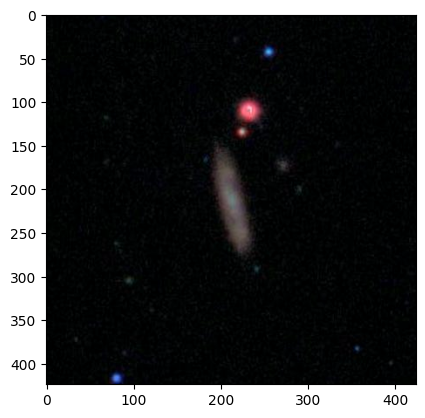

In [17]:
img = np.asarray(cv2.imread("images_training_rev1/313205.jpg"))
pl.imshow(img);

In [21]:
data = glob.glob("images_training_rev1/*")[:1000]

In [22]:
data

['images_training_rev1/316161.jpg',
 'images_training_rev1/400502.jpg',
 'images_training_rev1/438277.jpg',
 'images_training_rev1/454653.jpg',
 'images_training_rev1/108066.jpg',
 'images_training_rev1/234378.jpg',
 'images_training_rev1/368082.jpg',
 'images_training_rev1/180133.jpg',
 'images_training_rev1/180853.jpg',
 'images_training_rev1/201801.jpg',
 'images_training_rev1/476742.jpg',
 'images_training_rev1/463926.jpg',
 'images_training_rev1/276641.jpg',
 'images_training_rev1/167573.jpg',
 'images_training_rev1/441028.jpg',
 'images_training_rev1/402249.jpg',
 'images_training_rev1/421503.jpg',
 'images_training_rev1/152297.jpg',
 'images_training_rev1/345663.jpg',
 'images_training_rev1/259239.jpg',
 'images_training_rev1/415558.jpg',
 'images_training_rev1/155242.jpg',
 'images_training_rev1/316090.jpg',
 'images_training_rev1/319839.jpg',
 'images_training_rev1/434369.jpg',
 'images_training_rev1/499198.jpg',
 'images_training_rev1/234868.jpg',
 'images_training_rev1/23454

In [29]:
# this takes several tens of minutes

ims = np.zeros([1000, img.shape[0], img.shape[1], img.shape[2]], dtype=np.uint8)
import tqdm

for i,im in tqdm.tqdm(enumerate(data)):
  ims[i] = np.asarray( cv2.imread(im))


1000it [04:38,  3.59it/s]


In [30]:
np.save("galaxies.npy", ims)

In [31]:
ims.shape

(1000, 424, 424, 3)

# I am going to modify the current 18 probabilistic labels to obtain 4 labels that classify galaxies as :
#  spiral,
# elliptical
# irregular
# not-a-galaxy

In [32]:
nga = training_labels["Class1.3"]
spi = training_labels[["Class5.1", "Class5.2", "Class5.3", "Class5.4"]].max(axis=1)
ell = training_labels["Class6.2"]
irr = training_labels[["Class8.1", "Class8.2", "Class8.3", "Class8.4", "Class8.5", "Class8.6", "Class8.7"]].max(axis=1)
training_labels2 = pd.DataFrame({"nga": nga, "spi":spi, "ell":ell, "irr":irr})

In [33]:
training_labels2

,nga,spi,ell,irr
0,0.000000,0.512101,0.945547,0.027227
1,0.009222,0.236781,0.810851,0.140353
2,0.056931,0.117790,1.000000,0.000000
3,0.068059,0.125280,0.679602,0.128159
4,0.066161,0.000000,0.970617,0.029383
...,...,...,...,...
61573,0.000000,0.260804,0.754266,0.175454
61574,0.000000,0.053406,0.872356,0.062095
61575,0.019783,0.347328,0.160814,0.604214
61576,0.000000,0.545764,0.136000,0.500256


In [36]:
training_labels2.to_csv("training_solutions_rev1_short.csv", index=None)